In [1]:
import logging
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.arg_extract import get_args
from utils.experiment_evaluator import evaluate_experiment
from utils.experiment import Experiment
from argparse import Namespace
from utils.experiment_evaluator import image_prepro, create_evaluation_dataloader, get_test_predictions_pairs, save_sequence_plots
import os
from utils.io import save
plt.ioff()
from utils.io import load
batch_images_all = load('batches.pickle')

data_directory = '../experiments_results/'
experiments = [dI for dI in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, dI))]

In [2]:
# dd = {'experiment_name': 'ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5',
#         'num_epochs': 1,
#         'num_workers': 1,
#         'test_starting_point': 15,
#         'num_total_output_frames':80,
#         'debug': False}

# args_new = Namespace(**dd)
# experiment = Experiment(args_new)
# experiment.load_from_disk(test=True)
    
    
# dataloaders = {"Test": experiment.dataloaders['test'],
#                "Lines": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Lines/'), experiment.args.normalizer_type),
#                "Double_Drop": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Double_Drop/'), experiment.args.normalizer_type),
#                "Illumination_135": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Illumination_135/'), experiment.args.normalizer_type),
#              "Illumination_Random": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Illumination_Random/'), experiment.args.normalizer_type),
#                "Shallow_Depth": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Shallow_Depth/'), experiment.args.normalizer_type),
#                "Smaller_Tub": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Smaller_Tub/'), experiment.args.normalizer_type),
#                "Bigger_Tub": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Bigger_Tub/'), experiment.args.normalizer_type),
#                 "Fixed_Tub": create_evaluation_dataloader(os.path.join(experiment.dirs['data_base'], 'Fixed_Tub_10/'), experiment.args.normalizer_type)

#                }

# batch_images_all = {}
# for dset, dloader in dataloaders.items():
#     it = iter(dloader)
#     for i in range(1,4):
#         batch_images_all[dset+'_%s'%i] = next(it)
        
# save(batch_images_all, 'batches.pickle')

In [3]:
def plot_all_tests_for_experiment(experiment, exp, belated):
    frames = [0, 9, 19, 29, 39, 59, 79]
    fig, ax = plt.subplots(int(len(batch_images_all)/3) * 2, len(frames), figsize = (19, 45))

    
    for i, k in enumerate(list(batch_images_all.keys())[::3]):
        batch_images = batch_images_all[k]
        output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                              batch_images, 
                                                              args_new.test_starting_point-experiment.args.num_input_frames, 
                                                              args_new.num_total_output_frames)
        output_frames = image_prepro(output_frames, experiment.normalizer)
        target_frames = image_prepro(target_frames, experiment.normalizer)

        t = 0
        ax[2*i, t].set_ylabel(k.upper(), rotation=45, fontsize=20)
        ax[2*i, t].yaxis.set_label_coords(-0.2,0.5)
        ax[2*i, t].get_yaxis().set_ticks([])
        ax[2*i, t].spines['top'].set_visible(False)
        ax[2*i, t].spines['right'].set_visible(False)
        ax[2*i, t].spines['bottom'].set_visible(False)
        ax[2*i, t].spines['left'].set_visible(False)
        ax[2*i, t].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)

        ax[2*i+1, t].set_ylabel('Prediction', rotation=45, fontsize=20)
        ax[2*i+1, t].yaxis.set_label_coords(-0.2,0.5)
        ax[2*i+1, t].get_yaxis().set_ticks([])
        ax[2*i+1, t].spines['top'].set_visible(False)
        ax[2*i+1, t].spines['right'].set_visible(False)
        ax[2*i+1, t].spines['bottom'].set_visible(False)
        ax[2*i+1, t].spines['left'].set_visible(False)
        ax[2*i+1, t].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)

        for t in range(len(frames)):
            if t > 0:
                ax[2*i, t].axis('off')
                ax[2*i+1, t].axis('off')
            if i == 0:
                ax[2*i, t].set_title('t = ' + str(frames[t]+1), fontsize=30)
            ax[2*i, t].imshow(target_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
            ax[2*i+1, t].imshow(output_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
    #         ax[i,0].set_ylabel('test', rotation = 0)

    exp_name = exp + '_belated' if belated else exp
    fig.suptitle(exp_name, fontsize=24) # or plt.suptitle('Main title')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.00, top=0.95, wspace=0.05)
#     plt.show()
    plt.savefig('qualitative/Individual_Models/%s.png'% exp_name, format='png')
    plt.close()

In [4]:
# [e for e in experiments if 'ar_lstm' in e and 'dilated' not in e]

In [5]:
# experiments.sort()
# for exp in experiments:
#     print(exp)
#     dd = {'experiment_name': exp,
#             'num_epochs': 1,
#             'num_workers': 1,
#             'test_starting_point': 15,
#             'num_total_output_frames':80,
#             'debug': False}

#     args_new = Namespace(**dd)
#     experiment = Experiment(args_new)
#     experiment.load_from_disk(test=True)
    
#     plot_all_tests_for_experiment(experiment, exp, belated=False)
#     if experiment.args.model_type == 'convlstm' or experiment.args.model_type == 'predrnn':
#         plot_all_tests_for_experiment(experiment, exp, belated=True)

In [6]:
def get_experiment_predictions(exp, batch_images):

    if 'belated' in exp:
        exp = exp[:-8]
        belated = True
    else:
        belated = False

#     print(exp)
    dd = {'experiment_name': exp,
            'num_epochs': 1,
            'num_workers': 1,
            'test_starting_point': 15,
            'num_total_output_frames':80,
            'debug': False}

    args_new = Namespace(**dd)
    experiment = Experiment(args_new)
    experiment.load_from_disk(test=True)
    
    output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                              batch_images, 
                                                              args_new.test_starting_point-experiment.args.num_input_frames, 
                                                              args_new.num_total_output_frames)
    return image_prepro(output_frames, experiment.normalizer), image_prepro(target_frames, experiment.normalizer)

# All models comp

In [60]:
exps_to_plot = {
    'ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5' : 'LSTM',
   'resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7': 'CNN',
           'convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c_belated': 'Conv\nLSTM-R',
    'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_belated': 'Causal\nLSTM-R',
    'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7': 'CDNN'
}

def plot_model_comparison_all(test_set):
    batch_images = batch_images_all[test_set]
    frames = [9, 19, 29, 39, 59, 79]
    fig, ax = plt.subplots(len(exps_to_plot)+1, len(frames), figsize = (16, 16))

    fontsize = 36

    for i, exp in enumerate(exps_to_plot.keys()):
        output_frames, target_frames = get_experiment_predictions(exp, batch_images)
#         print(output_frames.min(), output_frames.max())
        i += 1
        rot=90
        ax[i, 0].set_ylabel(exps_to_plot[exp], rotation=rot, fontsize=fontsize)
        for t in range(len(frames)):
            ax[i, t].imshow(output_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
            ax[i, t].yaxis.set_label_coords(-0.05,0.5)
            ax[i, t].get_yaxis().set_ticks([])
            ax[i, t].spines['top'].set_visible(False)
            ax[i, t].spines['right'].set_visible(False)
            ax[i, t].spines['bottom'].set_visible(False)
            ax[i, t].spines['left'].set_visible(False)
            ax[i, t].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            
    i = 0
    t = 0
    ax[i, t].set_ylabel('Ground\ntruth', rotation=rot, fontsize=fontsize, labelpad=100)
    for t in range(len(frames)):
        ax[i, t].imshow(target_frames[0, frames[t], :, :], cmap='gray', vmin=0 , vmax=1)
        ax[i, t].yaxis.set_label_coords(-0.05,0.5)
        ax[i, t].get_yaxis().set_ticks([])
        ax[i, t].spines['top'].set_visible(False)
        ax[i, t].spines['right'].set_visible(False)
        ax[i, t].spines['bottom'].set_visible(False)
        ax[i, t].spines['left'].set_visible(False)
        ax[i, t].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        ax[i, t].set_title('t=' + str(frames[t]+1), fontsize=fontsize)

        
#     fig.suptitle(test_set, fontsize=fontsize*1.5) # or plt.suptitle('Main title')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.03)
#     plt.savefig('qualitative/Best_Model_Comparison/Evaluate_%s.png'% test_set, format='png')
    plt.savefig('qualitative/Best_Model_Comparison/Qualitative_%s.pdf'% test_set, format='pdf')
#     plt.show()
    plt.close()
    
    
for test_set in batch_images_all.keys():
#     test_set='Test_1'
    print(test_set)
    plot_model_comparison_all(test_set)
#     break

Test_1
Test_2
Test_3
Lines_1
Lines_2
Lines_3
Double_Drop_1
Double_Drop_2
Double_Drop_3
Illumination_135_1
Illumination_135_2
Illumination_135_3
Illumination_Random_1
Illumination_Random_2
Illumination_Random_3
Shallow_Depth_1
Shallow_Depth_2
Shallow_Depth_3
Smaller_Tub_1
Smaller_Tub_2
Smaller_Tub_3
Bigger_Tub_1
Bigger_Tub_2
Bigger_Tub_3
Fixed_Tub_1
Fixed_Tub_2
Fixed_Tub_3


# Two model comp

In [61]:
exps_to_plot = {
#     'ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5' : 'LSTM',
#    'resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7': 'CNN',
#            'convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c_belated': 'ConvLSTM-R',
    'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_belated': 'Causal\nLSTM-R',
    'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7': 'CDNN'
}

def plot_model_comparison_best(test_set):
    batch_images = batch_images_all[test_set]
    frames = [9, 19, 29, 39, 59, 79]
    fig, ax = plt.subplots(len(exps_to_plot)+1, len(frames), figsize = (16, 8))

    fontsize = 36

    for i, exp in enumerate(exps_to_plot.keys()):
        output_frames, target_frames = get_experiment_predictions(exp, batch_images)
#         print(output_frames.min(), output_frames.max())
        i += 1
        rot=90
        ax[i, 0].set_ylabel(exps_to_plot[exp], rotation=rot, fontsize=fontsize)
        for t in range(len(frames)):
            ax[i, t].imshow(output_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
            ax[i, t].yaxis.set_label_coords(-0.05,0.5)
            ax[i, t].get_yaxis().set_ticks([])
            ax[i, t].spines['top'].set_visible(False)
            ax[i, t].spines['right'].set_visible(False)
            ax[i, t].spines['bottom'].set_visible(False)
            ax[i, t].spines['left'].set_visible(False)
            ax[i, t].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            
    i = 0
    t = 0
    ax[i, t].set_ylabel('Ground\ntruth', rotation=rot, fontsize=fontsize, labelpad=100)
    for t in range(len(frames)):
        ax[i, t].imshow(target_frames[0, frames[t], :, :], cmap='gray', vmin=0 , vmax=1)
        ax[i, t].yaxis.set_label_coords(-0.05,0.5)
        ax[i, t].get_yaxis().set_ticks([])
        ax[i, t].spines['top'].set_visible(False)
        ax[i, t].spines['right'].set_visible(False)
        ax[i, t].spines['bottom'].set_visible(False)
        ax[i, t].spines['left'].set_visible(False)
        ax[i, t].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        ax[i, t].set_title('t=' + str(frames[t]+1), fontsize=fontsize)

        
#     fig.suptitle(test_set, fontsize=fontsize*1.5) # or plt.suptitle('Main title')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.03)
#     plt.savefig('qualitative/Best_Model_Comparison/Evaluate_%s.png'% test_set, format='png')
    plt.savefig('qualitative/Causal_CDNN_Comparison/Qualitative_%s.pdf'% test_set, format='pdf')
#     plt.show()
    plt.close()
    
    
for test_set in batch_images_all.keys():
#     test_set='Test_1'
    print(test_set)
    plot_model_comparison_best(test_set)
#     break

Test_1
Test_2
Test_3
Lines_1
Lines_2
Lines_3
Double_Drop_1
Double_Drop_2
Double_Drop_3
Illumination_135_1
Illumination_135_2
Illumination_135_3
Illumination_Random_1
Illumination_Random_2
Illumination_Random_3
Shallow_Depth_1
Shallow_Depth_2
Shallow_Depth_3
Smaller_Tub_1
Smaller_Tub_2
Smaller_Tub_3
Bigger_Tub_1
Bigger_Tub_2
Bigger_Tub_3
Fixed_Tub_1
Fixed_Tub_2
Fixed_Tub_3


In [78]:
experiments

['predrnn_batch_4_samples_5_in_5_out_40_normal_lr_0.0001_dataset_original_24h_patience_3',
 'convlstm_batch_6_samples_5_in_5_out_20_normal_lr_0.001',
 'ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_fixed_tub_24h_patience_5',
 'resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7',
 'convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c',
 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_back_and_forth_True',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7_back_and_forth_True',
 'predrnn_batch_8_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_back_and_forth_True',
 'unet_batch_16_samples_10_in_5_out_40_normal_lr_0.0001_dataset_original_24h_patience_7',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_fixed_tub_24h_pa

# Back Forth

In [9]:
exps_to_plot = {
# 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_belated': 'Causal\nLSTM-R',
# 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_back_and_forth_True':'Causal\nLSTM-R BF',
    
'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7': 'CDNN',
'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7_back_and_forth_True' : 'CDNN BF'
}

def plot_model_comparison_bf(test_set):
    batch_images = batch_images_all[test_set]
    frames = [9, 19, 29, 39, 59, 79]
    fig, ax = plt.subplots(len(exps_to_plot)+1, len(frames), figsize = (16, 8))

    fontsize = 36

    for i, exp in enumerate(exps_to_plot.keys()):
        output_frames, target_frames = get_experiment_predictions(exp, batch_images)
#         print(output_frames.min(), output_frames.max())
        i += 1
        rot=90
        ax[i, 0].set_ylabel(exps_to_plot[exp], rotation=rot, fontsize=fontsize)
        for t in range(len(frames)):
            ax[i, t].imshow(output_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
            ax[i, t].yaxis.set_label_coords(-0.05,0.5)
            ax[i, t].get_yaxis().set_ticks([])
            ax[i, t].spines['top'].set_visible(False)
            ax[i, t].spines['right'].set_visible(False)
            ax[i, t].spines['bottom'].set_visible(False)
            ax[i, t].spines['left'].set_visible(False)
            ax[i, t].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            
    i = 0
    t = 0
    ax[i, t].set_ylabel('Ground\ntruth', rotation=rot, fontsize=fontsize, labelpad=100)
    for t in range(len(frames)):
        ax[i, t].imshow(target_frames[0, frames[t], :, :], cmap='gray', vmin=0 , vmax=1)
        ax[i, t].yaxis.set_label_coords(-0.05,0.5)
        ax[i, t].get_yaxis().set_ticks([])
        ax[i, t].spines['top'].set_visible(False)
        ax[i, t].spines['right'].set_visible(False)
        ax[i, t].spines['bottom'].set_visible(False)
        ax[i, t].spines['left'].set_visible(False)
        ax[i, t].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        ax[i, t].set_title('t=' + str(frames[t]+1), fontsize=fontsize)

        
#     fig.suptitle(test_set, fontsize=fontsize*1.5) # or plt.suptitle('Main title')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.01, wspace=0.03)
#     plt.savefig('qualitative/Best_Model_Comparison/Evaluate_%s.png'% test_set, format='png')
    plt.savefig('qualitative/BF_Comparison/CDNN_Qualitative_%s.pdf'% test_set, format='pdf')
#     plt.show()
    plt.close()
    
    
for test_set in batch_images_all.keys():
#     test_set='Test_1'
    print(test_set)
    plot_model_comparison_bf(test_set)
#     break

Test_1
Test_2
Test_3
Lines_1
Lines_2
Lines_3
Double_Drop_1
Double_Drop_2
Double_Drop_3
Illumination_135_1
Illumination_135_2
Illumination_135_3
Illumination_Random_1
Illumination_Random_2
Illumination_Random_3
Shallow_Depth_1
Shallow_Depth_2
Shallow_Depth_3
Smaller_Tub_1
Smaller_Tub_2
Smaller_Tub_3
Bigger_Tub_1
Bigger_Tub_2
Bigger_Tub_3
Fixed_Tub_1
Fixed_Tub_2
Fixed_Tub_3


In [64]:
def plot_one_tests_for_experiment(experiment, exp, test_set, belated):
    exp_name = exp + '_belated' if belated else exp
    frames = [9, 19, 49, 79]
    fig, ax = plt.subplots(2, len(frames), figsize = (14.8, 8))
    fontsize=40
    angle = 90
    
    batch_images = batch_images_all[test_set]
    output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                          batch_images, 
                                                          args_new.test_starting_point-experiment.args.num_input_frames, 
                                                          args_new.num_total_output_frames)
    output_frames = image_prepro(output_frames, experiment.normalizer)
    target_frames = image_prepro(target_frames, experiment.normalizer)

    i = 0
    t = 0
    ax[2*i, t].set_ylabel('Ground truth', rotation=angle, fontsize=fontsize)
    ax[2*i, t].yaxis.set_label_coords(-0.05,0.5)
    ax[2*i, t].get_yaxis().set_ticks([])
    ax[2*i, t].spines['top'].set_visible(False)
    ax[2*i, t].spines['right'].set_visible(False)
    ax[2*i, t].spines['bottom'].set_visible(False)
    ax[2*i, t].spines['left'].set_visible(False)
    ax[2*i, t].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

    ax[2*i+1, t].set_ylabel('Prediction', rotation=angle, fontsize=fontsize)
    ax[2*i+1, t].yaxis.set_label_coords(-0.05,0.5)
    ax[2*i+1, t].get_yaxis().set_ticks([])
    ax[2*i+1, t].spines['top'].set_visible(False)
    ax[2*i+1, t].spines['right'].set_visible(False)
    ax[2*i+1, t].spines['bottom'].set_visible(False)
    ax[2*i+1, t].spines['left'].set_visible(False)
    ax[2*i+1, t].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

    for t in range(len(frames)):
        if t > 0:
            ax[2*i, t].axis('off')
            ax[2*i+1, t].axis('off')
        if i == 0:
            ax[2*i, t].set_title('t = ' + str(frames[t]+1), fontsize=fontsize)
        ax[2*i, t].imshow(target_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
        ax[2*i+1, t].imshow(output_frames[0, frames[t], :, :], cmap='gray', vmin=0, vmax=1)
        
        for one_line in [False]:
            get_cutthrough_plot_report(exp_name, frames[t]+1, output_frames[0, frames[t], :, :].numpy(), 
                                       target_frames[0, frames[t], :, :].numpy(), direction='Horizontal', 
                                       one_line=one_line)
        
        
#     fig.suptitle(exp_name, fontsize=24) # or plt.suptitle('Main title')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.00, wspace=0.05)
#     plt.show()
    plt.savefig('qualitative/one_model_one_exp/%s.pdf'% exp_name, format='pdf')
    plt.close()

# One model one exp

In [74]:
experiments2 = [e for e in experiments if 'fixed_tub' not in e]
experiments2.sort()
experiments2

['ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5',
 'convlstm_batch_6_samples_5_in_5_out_20_normal_lr_0.001',
 'convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c',
 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3',
 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_back_and_forth_True',
 'predrnn_batch_4_samples_5_in_5_out_40_normal_lr_0.0001_dataset_original_24h_patience_3',
 'predrnn_batch_8_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3_back_and_forth_True',
 'resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7',
 'resnet_dilated_batch_16_samples_5_in_5_out_40_normal_lr_0.0001_dataset_original_24h_patience_7',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7_bac

In [65]:
experiments3= ['ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5',
 'convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c',
 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3',
 'resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7',
 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7'
              ]

In [128]:
from utils.plotting_for_report import get_cutthrough_plot_report

experiments2 = [e for e in experiments if 'fixed_tub' not in e]
experiments2.sort()

for exp_name in experiments3:
    print(exp_name)
    dd = {'experiment_name': exp_name,
            'num_epochs': 1,
            'num_workers': 1,
            'test_starting_point': 15,
            'num_total_output_frames':80,
            'debug': False}

    args_new = Namespace(**dd)
    experiment = Experiment(args_new)
    experiment.load_from_disk(test=True)
    
    plot_one_tests_for_experiment(experiment, exp_name, 'Test_1', belated=False)
    if 'lstm' in experiment.args.model_type or experiment.args.model_type == 'predrnn':
        plot_one_tests_for_experiment(experiment, exp_name, 'Test_1', belated=True)

ar_lstm_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_16h_patience_5
convlstm_batch_8_samples_5_in_5_out_10_normal_lr_0.001_16h_c
predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3
resnet_dilated_batch_16_samples_5_in_5_out_10_normal_lr_0.0001_dataset_original_24h_patience_7
unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7


In [120]:
# plt.rcParams.keys()

In [11]:
test_set='Test_1'
exp_name =  'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3'
batch_images = batch_images_all[test_set]
belated=True

dd = {'experiment_name': exp_name,
        'num_epochs': 1,
        'num_workers': 1,
        'test_starting_point': 15,
        'num_total_output_frames':80,
        'debug': False}

args_new = Namespace(**dd)
experiment = Experiment(args_new)
experiment.load_from_disk(test=True)
    
output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                      batch_images, 
                                                      args_new.test_starting_point-experiment.args.num_input_frames, 
                                                      args_new.num_total_output_frames)
output_frames_b = image_prepro(output_frames, experiment.normalizer)

belated=False
output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                      batch_images, 
                                                      args_new.test_starting_point-experiment.args.num_input_frames, 
                                                      args_new.num_total_output_frames)
output_frames = image_prepro(output_frames, experiment.normalizer)
target_frames = image_prepro(target_frames, experiment.normalizer)

frame_num = 80
target = target_frames[0, -1, :, :].numpy()
predicted = output_frames[0, -1, :, :].numpy()
predicted_b = output_frames_b[0, -1, :, :].numpy()

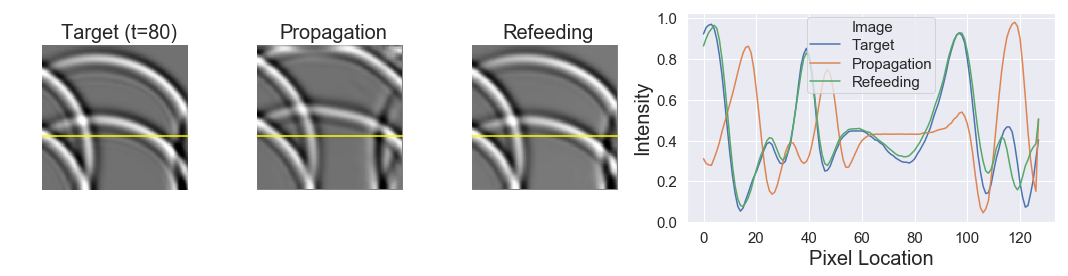

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from utils.plotting import imshow

def imshow(image, title=None, smoothen=False, return_np=False, obj=None):
    """Imshow for Tensor."""
    smooth_filter = (.5, .5)

    if smoothen:
        image = ndimage.gaussian_filter(image, sigma=smooth_filter)

    # image = np.clip(image, 0, 1)
    if obj is not None:
        obj.imshow(image, cmap='gray', interpolation='none')
        obj.axis("off")
        if title is not None:
            obj.set_title(title, fontdict={'fontsize': 20, 'fontweight': 'medium'})

    if return_np:
        return image
    
def cutthrough(img1, img2, img3, hue1, hue2, hue3):
    intensity = []
    location = []
    hue = []
    intensity = np.append(img1[stdmax[0], :], img2[stdmax[0], :])
    intensity = np.append(intensity, img3[stdmax[0], :])
    length1 = img1.shape[1]
    length2 = img2.shape[1]
    length3 = img3.shape[1]
    
    sns.set(rc={'figure.figsize':(16, 4),
            "lines.linewidth": 1.5,
            'figure.titlesize': 5*scale,
        "axes.labelsize": 40*scale,
        'ytick.labelsize': 20*scale,
        'xtick.labelsize': 20*scale,
        'legend.fontsize': 30*scale,
        'legend.borderpad': 0.2,
        'legend.columnspacing': 0.5,
        'legend.labelspacing':0.3,
        'legend.borderaxespad': 0.3})

    location = list(range(length1)) + list(range(length2)) + list(range(length3))
    hue = [hue1] * length1 + [hue2] * length2 + [hue3] * length3


    data_dict = {"Intensity": intensity, "Pixel Location": location, "Image": hue}
    sns.lineplot(x="Pixel Location", y="Intensity", hue="Image",
                 data=pd.DataFrame.from_dict(data_dict), ax=profile)
#     print(pd.DataFrame.from_dict(data_dict))
    plt.tight_layout()


fig = plt.figure()
sns.set_context("paper", font_scale=2)


scale = 0.5
sns.set(rc={'figure.figsize':(15,4),
            "lines.linewidth": 1.5,
            'figure.titlesize': 5*scale,
        "axes.labelsize": 40*scale,
        'ytick.labelsize': 30*scale,
        'xtick.labelsize': 30*scale,
        'legend.fontsize': 20*scale,
        'legend.borderpad': 0.2,
        'legend.columnspacing': 0.5,
        'legend.labelspacing':0.3,
        'legend.borderaxespad': 0.3})

gg=5
with sns.axes_style("white"):
    tar = fig.add_subplot(1, gg, 1)
    pre1 = fig.add_subplot(1, gg, 2)
    pre2 = fig.add_subplot(1, gg, 3)
with sns.axes_style("darkgrid"):  # darkgrid, whitegrid, dark, white, and ticks
    profile = fig.add_subplot(1, gg, (4, gg))
exp_name += '_one_line'


fig.subplots_adjust(wspace=0.2)

target = imshow(target, title="Target (t=80)", return_np=True, obj=tar)

# tar.imshow(target, cmap='gray', interpolation='none')
# tar.axis("off")
# plt.title("Target %d" % frame_num)
        
# predicted = 
imshow(predicted, title="Propagation", return_np=True, obj=pre1)
# predicted_b = 
imshow(predicted_b, title="Refeeding", return_np=True, obj=pre2)
# plt.tight_layout()
# 
std = np.std(target, axis=1)
stdmax = np.where(std.max() == std)[0]  # just keep one line

tar.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
pre1.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
pre2.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")

cutthrough(target, predicted, predicted_b, "Target", "Propagation", "Refeeding")

fig.subplots_adjust(wspace=0.4)
# plt.tight_layout()
plt.savefig('qualitative/cutthrough/refeed.pdf', format='pdf')
plt.show()
plt.close()

# One Line 2 Models - Test

In [77]:
for test_set in batch_images_all.keys():
    exp_name =  'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3'
    batch_images = batch_images_all[test_set]
    belated=True

    dd = {'experiment_name': exp_name,
            'num_epochs': 1,
            'num_workers': 1,
            'test_starting_point': 15,
            'num_total_output_frames':80,
            'debug': False}

    args_new = Namespace(**dd)
    experiment = Experiment(args_new)
    experiment.load_from_disk(test=True)

    output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                          batch_images, 
                                                          args_new.test_starting_point-experiment.args.num_input_frames, 
                                                          args_new.num_total_output_frames)
    output_frames_b = image_prepro(output_frames, experiment.normalizer)

    exp_name =   'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7'
    dd = {'experiment_name': exp_name,
            'num_epochs': 1,
            'num_workers': 1,
            'test_starting_point': 15,
            'num_total_output_frames':80,
            'debug': False}

    args_new = Namespace(**dd)
    experiment = Experiment(args_new)
    experiment.load_from_disk(test=True)

    belated=False
    output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                          batch_images, 
                                                          args_new.test_starting_point-experiment.args.num_input_frames, 
                                                          args_new.num_total_output_frames)
    output_frames = image_prepro(output_frames, experiment.normalizer)
    target_frames = image_prepro(target_frames, experiment.normalizer)

    frame_num = 80
    target = target_frames[0, -1, :, :].numpy()
    predicted = output_frames[0, -1, :, :].numpy()
    predicted_b = output_frames_b[0, -1, :, :].numpy()

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    from utils.plotting import imshow

    def imshow(image, title=None, smoothen=False, return_np=False, obj=None):
        """Imshow for Tensor."""
        smooth_filter = (.5, .5)

        if smoothen:
            image = ndimage.gaussian_filter(image, sigma=smooth_filter)

        # image = np.clip(image, 0, 1)
        if obj is not None:
            obj.imshow(image, cmap='gray', interpolation='none')
            obj.axis("off")
            if title is not None:
                obj.set_title(title, fontdict={'fontsize': 20, 'fontweight': 'medium'})

        if return_np:
            return image

    def cutthrough(img1, img2, img3, hue1, hue2, hue3):
        intensity = []
        location = []
        hue = []
        intensity = np.append(img1[stdmax[0], :], img2[stdmax[0], :])
        intensity = np.append(intensity, img3[stdmax[0], :])
        length1 = img1.shape[1]
        length2 = img2.shape[1]
        length3 = img3.shape[1]

        sns.set(rc={'figure.figsize':(16, 4),
                "lines.linewidth": 1.5,
                'figure.titlesize': 5*scale,
            "axes.labelsize": 40*scale,
            'ytick.labelsize': 20*scale,
            'xtick.labelsize': 20*scale,
            'legend.fontsize': 30*scale,
            'legend.borderpad': 0.2,
            'legend.columnspacing': 0.5,
            'legend.labelspacing':0.3,
            'legend.borderaxespad': 0.3})

        location = list(range(length1)) + list(range(length2)) + list(range(length3))
        hue = [hue1] * length1 + [hue2] * length2 + [hue3] * length3


        data_dict = {"Intensity": intensity, "Pixel Location": location, "Image": hue}
        sns.lineplot(x="Pixel Location", y="Intensity", hue="Image",
                     data=pd.DataFrame.from_dict(data_dict), ax=profile)
    #     print(pd.DataFrame.from_dict(data_dict))
        plt.tight_layout()


    fig = plt.figure()
    sns.set_context("paper", font_scale=2)


    scale = 0.5
    sns.set(rc={'figure.figsize':(15,4),
                "lines.linewidth": 1.5,
                'figure.titlesize': 5*scale,
            "axes.labelsize": 40*scale,
            'ytick.labelsize': 30*scale,
            'xtick.labelsize': 30*scale,
            'legend.fontsize': 20*scale,
            'legend.borderpad': 0.2,
            'legend.columnspacing': 0.5,
            'legend.labelspacing':0.3,
            'legend.borderaxespad': 0.3})

    gg=5
    with sns.axes_style("white"):
        tar = fig.add_subplot(1, gg, 1)
        pre1 = fig.add_subplot(1, gg, 2)
        pre2 = fig.add_subplot(1, gg, 3)
    with sns.axes_style("darkgrid"):  # darkgrid, whitegrid, dark, white, and ticks
        profile = fig.add_subplot(1, gg, (4, gg))
    exp_name += '_one_line'


    fig.subplots_adjust(wspace=0.2)

    target = imshow(target, title="Target (t=80)", return_np=True, obj=tar)

    # tar.imshow(target, cmap='gray', interpolation='none')
    # tar.axis("off")
    # plt.title("Target %d" % frame_num)

    model_name_1 = 'Causal LSTM-R'
    model_name_2 = 'CDNN'
    imshow(predicted_b, title=model_name_1, return_np=True, obj=pre1)
    imshow(predicted, title=model_name_2, return_np=True, obj=pre2)
    # predicted_b = 
    # plt.tight_layout()
    # 
    std = np.std(target, axis=1)
    stdmax = np.where(std.max() == std)[0]  # just keep one line

    tar.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
    pre1.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
    pre2.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")

    cutthrough(target, predicted, predicted_b, "Target", model_name_1, model_name_2)

    fig.subplots_adjust(wspace=0.4)
    # plt.tight_layout()
    plt.savefig('qualitative/cutthrough/unet_vs_causal_%s.pdf' % test_set, format='pdf')
#     plt.show()
    plt.close()

# BF Lines

In [64]:
test_set='Lines_2'
batch_images = batch_images_all[test_set]
belated=False

exp_name = 'unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7'
name_exp_1 = 'CDNN'
dd = {'experiment_name': exp_name,
        'num_epochs': 1,
        'num_workers': 1,
        'test_starting_point': 15,
        'num_total_output_frames':80,
        'debug': False}

args_new = Namespace(**dd)
experiment = Experiment(args_new)
experiment.load_from_disk(test=True)
output_frames1, target_frames1 = get_test_predictions_pairs(experiment.model, belated, 
                                                      batch_images, 
                                                      args_new.test_starting_point-experiment.args.num_input_frames, 
                                                      args_new.num_total_output_frames)
output_frames1 = image_prepro(output_frames1, experiment.normalizer)
target_frames1 = image_prepro(target_frames1, experiment.normalizer)

exp_name='unet_batch_16_samples_10_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_7_back_and_forth_True'
name_exp_2 = 'CDNN Reversible'
dd = {'experiment_name': exp_name,
        'num_epochs': 1,
        'num_workers': 1,
        'test_starting_point': 15,
        'num_total_output_frames':80,
        'debug': False}
args_new = Namespace(**dd)
experiment = Experiment(args_new)
experiment.load_from_disk(test=True)
output_frames2, target_frames2 = get_test_predictions_pairs(experiment.model, belated, 
                                                      batch_images, 
                                                      args_new.test_starting_point-experiment.args.num_input_frames, 
                                                      args_new.num_total_output_frames)
output_frames2 = image_prepro(output_frames2, experiment.normalizer)
target_frames2 = image_prepro(target_frames2, experiment.normalizer)

frame_num = 79
target1 = target_frames1[0, frame_num, :, :].numpy()
predicted1 = output_frames1[0, frame_num, :, :].numpy()
predicted2 = output_frames2[0, frame_num, :, :].numpy()

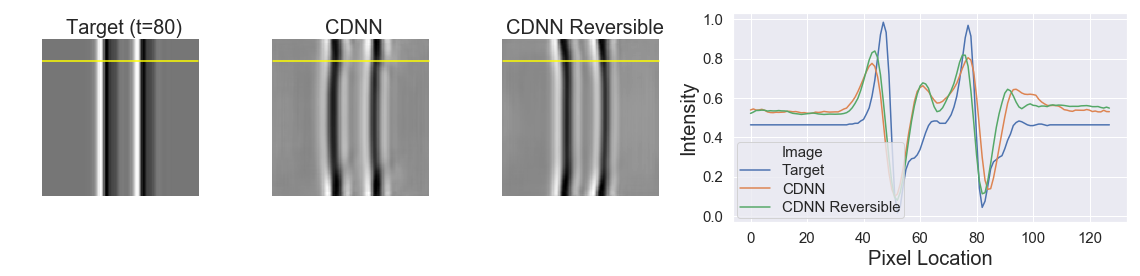

In [65]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from utils.plotting import imshow

def imshow(image, title=None, smoothen=False, return_np=False, obj=None):
    """Imshow for Tensor."""
    smooth_filter = (.5, .5)

    if smoothen:
        image = ndimage.gaussian_filter(image, sigma=smooth_filter)

    # image = np.clip(image, 0, 1)
    if obj is not None:
        obj.imshow(image, cmap='gray', interpolation='none')
        obj.axis("off")
        if title is not None:
            obj.set_title(title, fontdict={'fontsize': 20, 'fontweight': 'medium'})

    if return_np:
        return image
    
def cutthrough(img1, img2, img3, hue1, hue2, hue3):
    intensity = []
    location = []
    hue = []
    intensity = np.append(img1[stdmax[0], :], img2[stdmax[0], :])
    intensity = np.append(intensity, img3[stdmax[0], :])
    length1 = img1.shape[1]
    length2 = img2.shape[1]
    length3 = img3.shape[1]
    
    sns.set(rc={'figure.figsize':(16, 4),
            "lines.linewidth": 1.5,
            'figure.titlesize': 5*scale,
        "axes.labelsize": 40*scale,
        'ytick.labelsize': 20*scale,
        'xtick.labelsize': 20*scale,
        'legend.fontsize': 30*scale,
        'legend.borderpad': 0.2,
        'legend.columnspacing': 0.5,
        'legend.labelspacing':0.3,
        'legend.borderaxespad': 0.3})

    location = list(range(length1)) + list(range(length2)) + list(range(length3))
    hue = [hue1] * length1 + [hue2] * length2 + [hue3] * length3


    data_dict = {"Intensity": intensity, "Pixel Location": location, "Image": hue}
    sns.lineplot(x="Pixel Location", y="Intensity", hue="Image",
                 data=pd.DataFrame.from_dict(data_dict), ax=profile)
#     print(pd.DataFrame.from_dict(data_dict))
    plt.tight_layout()


fig = plt.figure()
sns.set_context("paper", font_scale=2)


scale = 0.5
sns.set(rc={'figure.figsize':(15,4),
            "lines.linewidth": 1.5,
            'figure.titlesize': 5*scale,
        "axes.labelsize": 40*scale,
        'ytick.labelsize': 30*scale,
        'xtick.labelsize': 30*scale,
        'legend.fontsize': 20*scale,
        'legend.borderpad': 0.2,
        'legend.columnspacing': 0.5,
        'legend.labelspacing':0.3,
        'legend.borderaxespad': 0.3})

gg=5
with sns.axes_style("white"):
    tar = fig.add_subplot(1, gg, 1)
    pre1 = fig.add_subplot(1, gg, 2)
    pre2 = fig.add_subplot(1, gg, 3)
with sns.axes_style("darkgrid"):  # darkgrid, whitegrid, dark, white, and ticks
    profile = fig.add_subplot(1, gg, (4, gg))
exp_name += '_one_line'


fig.subplots_adjust(wspace=0.2)

target = imshow(target1, title="Target (t=%d)" % (frame_num+1), return_np=True, obj=tar)

# tar.imshow(target, cmap='gray', interpolation='none')
# tar.axis("off")
# plt.title("Target %d" % frame_num)
        
# predicted = 
imshow(predicted1, title=name_exp_1, return_np=True, obj=pre1)
# predicted_b = 
imshow(predicted2, title=name_exp_2, return_np=True, obj=pre2)
# plt.tight_layout()
# 
std = np.std(target, axis=1)
stdmax = np.where(std.max() == std)[0]  # just keep one line

tar.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
pre1.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")
pre2.plot([0, np.shape(std)[0]], [stdmax[0], stdmax[0]], color="yellow")

cutthrough(target, predicted1, predicted2, "Target", name_exp_1, name_exp_2)

fig.subplots_adjust(wspace=0.4)
# plt.tight_layout()
plt.savefig('qualitative/cutthrough/bf_%s.pdf' %test_set, format='pdf')
plt.show()
plt.close()